#Team Name: Snow Ninjas

#Name and ID of Member 1: Ayan Banerjee , B2430042

#Name and ID of Member 2: Samya Mukherjee , B2430057




In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
import time

#1. Loading the Dataset

In [ ]:
df=pd.read_csv('/content/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


#2. Data Preprocessing

In [ ]:
df=df.drop(columns='Job Title')
df['Education Level'] = df['Education Level'].replace({'High School': -2, "Bachelor's": -1, "Master's": 1, 'PhD': 2})
df['Gender'] = df['Gender'].replace({'Female': -1, 'Male': 1})
df=df.dropna()
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,-1.0,5.0,90000.0
1,28.0,-1.0,1.0,3.0,65000.0
2,45.0,1.0,2.0,15.0,150000.0
3,36.0,-1.0,-1.0,7.0,60000.0
4,52.0,1.0,1.0,20.0,200000.0


In [ ]:
df=df.reset_index(drop=True)  # since we drop the rows which have NaN

In [ ]:
# Split the dataset into features (X) and target (y)

X=df.drop(columns='Salary')
y=df['Salary']

# Split the data into training and test sets (e.g., 80% training, 20% testing)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Scaling

SS=StandardScaler() # Create a StandardScaler object
X_train_SS=SS.fit_transform(X_train) # Fit and transform the training data
X_test_SS=SS.transform(X_test) # Transform the test data using the fitted scaler

#3. Simple Linear Regression

In [ ]:
# Fit the model on the training data

model=LinearRegression()
model.fit(X_train_SS,y_train)
print("Model coefficients are: ",model.coef_)


Model coefficients are:  [25494.28241061  3846.85926809 11300.19698404 12367.4367951 ]


In [ ]:
# Predict on the test data

y_pred=model.predict(X_test_SS)

# Calculate performance metrics [MSE, MAE, R^2]

mae=mean_absolute_error(y_test,y_pred)
mae1=mean_absolute_error(y_train,model.predict(X_train_SS))
mse=mean_squared_error(y_test,y_pred)
mse1=mean_squared_error(y_train,model.predict(X_train_SS))
r0=r2_score(y_test,y_pred)
r1=r2_score(y_train,model.predict(X_train_SS))

# Print the metrics

print("Mean absolute error for test data is: ",mae)
print("Mean absolute error for train data is: ",mae1)
print("Root Mean squared error for test data is: ",np.sqrt(mse))
print("Root Mean squared error for train data is: ",np.sqrt(mse1))
print("R2 score for test data is: ",r0)
print("R2 score for train data is: ",r1)

Mean absolute error for test data is:  10525.627983595525
Mean absolute error for train data is:  11216.912785304183
Root Mean squared error for test data is:  15232.761897808396
Root Mean squared error for train data is:  15080.224796287855
R2 score for test data is:  0.9032204055883191
R2 score for train data is:  0.9011430264604348


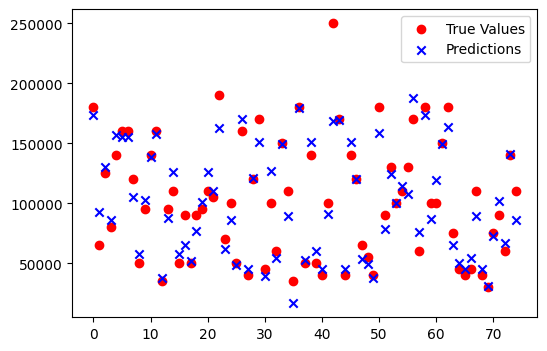

In [ ]:
# Plotting of predicted values and actual values on Test set

fig,ax = plt.subplots(figsize=(6, 4))
ax.scatter(range(len(y_test)), y_test, color='red', label='True Values', marker='o')
ax.scatter(range(len(y_pred)), y_pred, color='blue', label='Predictions', marker='x')
plt.legend()

RMSE is high as there are some outliers in test set

#4. Polynomial Regression

In [ ]:
# Fit the linear model on polynomial features

degree=2
poly=PolynomialFeatures(degree)
X_train_poly=poly.fit_transform(X_train_SS)
X_test_poly=poly.fit_transform(X_test_SS)
poly.fit(X_train_poly,y_train)
model.fit(X_train_poly,y_train)
print("Model cefficients are: ",model.coef_)

Model cefficients are:  [ 0.00000000e+00  1.73798979e+04 -1.53000905e+13  1.03566493e+04
  2.36655932e+04 -2.54472476e+04 -6.51377130e+03 -1.50951281e+04
  7.70448068e+04 -5.69877027e+14 -1.72853374e+03  9.29417980e+03
 -3.18148028e+03  2.00251383e+04 -5.63475182e+04]


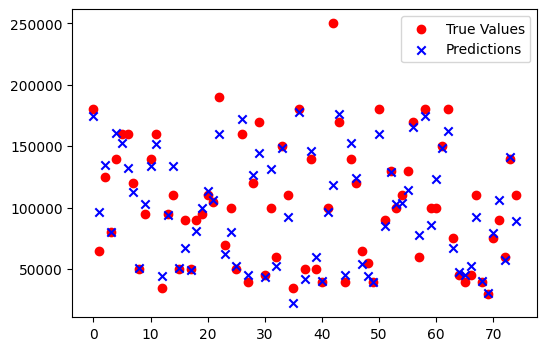

In [ ]:
# Predict and evaluate performance
y_pred=model.predict(X_test_poly)

# Plotting of Predicted and actual values
fig,ax = plt.subplots(figsize=(6, 4))

# Scatter plot for true values
ax.scatter(range(len(y_test)), y_test, color='red', label='True Values', marker='o')

# Scatter plot for predictions
ax.scatter(range(len(y_pred)), y_pred, color='blue', label='Predictions', marker='x')
plt.legend()

In [ ]:
# Calculate performance metrics for polynomial regression of degree 2

mae=mean_absolute_error(y_test,y_pred)
mae1=mean_absolute_error(y_train,model.predict(X_train_poly))
mse=mean_squared_error(y_test,y_pred)
mse1=mean_squared_error(y_train,model.predict(X_train_poly))
r0=r2_score(y_test,y_pred)
r1=r2_score(y_train,model.predict(X_train_poly))

# Print the metrics for polynomial regression

print("Mean absolute error for test data is: ",mae)
print("Mean absolute error for train data is: ",mae1)
print("Root Mean squared error for test data is: ",np.sqrt(mse))
print("Root Mean squared error for train data is: ",np.sqrt(mse1))
print("R2 score for test data is: ",r0)
print("R2 score for train data is: ",r1)

Mean absolute error for test data is:  10942.22
Mean absolute error for train data is:  10019.41904362416
Root Mean squared error for test data is:  19594.391835665207
Root Mean squared error for train data is:  13995.76221350692
R2 score for test data is:  0.839863597648082
R2 score for train data is:  0.9148499729692713


 POLYNOMIAL  REGRESSION  OF  DEGREE  3

In [ ]:
# Fit the linear model on polynomial features
degree=3
poly=PolynomialFeatures(degree)
X_train_poly=poly.fit_transform(X_train_SS)
X_test_poly=poly.fit_transform(X_test_SS)
poly.fit(X_train_poly,y_train)
model.fit(X_train_poly,y_train)
print("Model cefficients are: ",model.coef_)

# Predict and evaluate performance

y_pred=model.predict(X_test_poly)


Model cefficients are:  [ 2.48144907e-09 -5.41580598e+14 -5.12206098e+13  7.68134210e+14
 -8.36729902e+13  4.03873274e+03  1.45403864e+13 -3.72854753e+03
  5.61020358e+03  4.16277995e+15  1.83649298e+13  2.24645717e+12
  6.33273183e+15  5.27090369e+03 -1.22252258e+04  6.37824422e+03
 -2.75973980e+03  9.23456834e+03 -4.38125689e+04  5.41580598e+14
  3.75112753e+03  8.20379800e+03  6.55892497e+03 -3.56733970e+04
  8.45727607e+04  1.62865764e+14  6.84032006e+14  8.36729902e+13
 -2.17152099e+03 -5.34513463e+03 -6.16356981e+03 -3.27982596e+15
 -1.27948514e+04  3.22613906e+04 -4.78760625e+04]


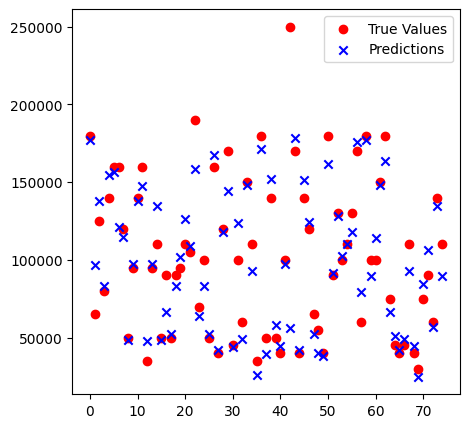

In [ ]:
# Plotting

fig,ax = plt.subplots(figsize=(5,5))

# Scatter plot for true values
ax.scatter(range(len(y_test)), y_test, color='red', label='True Values', marker='o')

# Scatter plot for predictions
ax.scatter(range(len(y_pred)), y_pred, color='blue', label='Predictions', marker='x')
plt.legend()

In [ ]:
# Calculate and Print performance metrics for polynomial regression

mae=mean_absolute_error(y_test,y_pred)
mae1=mean_absolute_error(y_train,model.predict(X_train_poly))
print("Mean absolute error for test data is: ",mae)
print("Mean absolute error for train data is: ",mae1)
mse=mean_squared_error(y_test,y_pred)
mse1=mean_squared_error(y_train,model.predict(X_train_poly))
print("Mean squared error for test data is: ",np.sqrt(mse))
print("Mean squared error for train data is: ",np.sqrt(mse1))
print("R2 score for test data is: ",r2_score(y_test,y_pred))
print("R2 score for train data is: ",r2_score(y_train,model.predict(X_train_poly)))

Mean absolute error for test data is:  11927.626666666667
Mean absolute error for train data is:  9450.895973154362
Mean squared error for test data is:  25629.58544495014
Mean squared error for train data is:  13323.210577936043
R2 score for test data is:  0.7260258088370506
R2 score for train data is:  0.9228369360776035


 POLYNOMIAL  REGRESSION  OF  DEGREE  4

In [ ]:
# Fit the linear model on polynomial features
degree=4
poly=PolynomialFeatures(degree)
X_train_poly=poly.fit_transform(X_train_SS)
X_test_poly=poly.fit_transform(X_test_SS)
poly.fit(X_train_poly,y_train)
model.fit(X_train_poly,y_train)


# Predict and evaluate performance

y_pred=model.predict(X_test_poly)


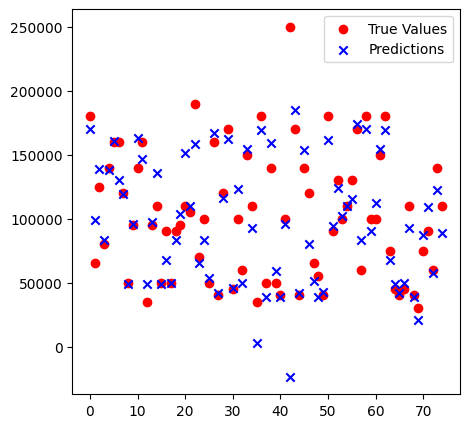

In [ ]:
# Plotting

fig,ax = plt.subplots(figsize=(5,5))

# Scatter plot for true values
ax.scatter(range(len(y_test)), y_test, color='red', label='True Values', marker='o')

# Scatter plot for predictions
ax.scatter(range(len(y_pred)), y_pred, color='blue', label='Predictions', marker='x')
plt.legend()


In [ ]:
# Calculate and Print performance metrics for polynomial regression

mae=mean_absolute_error(y_test,y_pred)
mae1=mean_absolute_error(y_train,model.predict(X_train_poly))
print("Mean absolute error for test data is: ",mae)
print("Mean absolute error for train data is: ",mae1)
mse=mean_squared_error(y_test,y_pred)
mse1=mean_squared_error(y_train,model.predict(X_train_poly))
print("Root Mean squared error for test data is: ",np.sqrt(mse))
print("Root Mean squared error for train data is: ",np.sqrt(mse1))
print("R2 score for test data is: ",r2_score(y_test,y_pred))
print("R2 score for train data is: ",r2_score(y_train,model.predict(X_train_poly)))

Mean absolute error for test data is:  14547.626666666667
Mean absolute error for train data is:  8875.604026845638
Root Mean squared error for test data is:  34832.79596701936
Root Mean squared error for train data is:  12693.053607884018
R2 score for test data is:  0.49393865885632926
R2 score for train data is:  0.9299635848873778


#5.  Gradient Descent Methods

Instruction: Implement batch, stochastic, and mini-batch gradient descent for linear regression.

BATCH GRADIENT DESCENT

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

theta = np.zeros(X_train_SS.shape[1])
learning_rate = 0.01
iterations = 100

theta, cost_history = batch_gradient_descent(X_train_SS, y_train, theta, learning_rate, iterations)
print("Theta:", theta)
print("Final Cost function value on Training Data:", compute_cost(X_train_SS, y_train, theta))

# Predict on the test set
predictions_test = X_test_SS.dot(theta)


m_test = len(y_test)
mse_test = mean_squared_error(y_test, predictions_test)

print("Root Mean Squared Error on Test Set:", np.sqrt(mse_test))
print("R2 score is: ",r2_score(y_test,predictions_test))

Theta: [16801.29499218  2288.06499095 11864.39835529 16679.65287191]
Final Cost function value on Training Data: 5134009056.849832
Root Mean Squared Error on Test Set: 103095.78918290677
R2 score is:  -3.4331083408664105


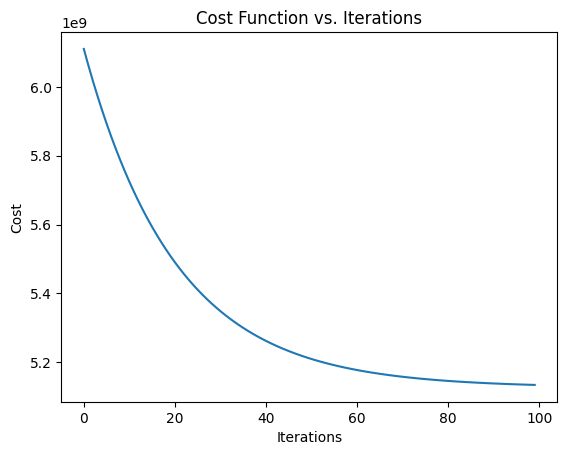

In [ ]:
# Plotting
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.show()

STOCHASTIC GRADIENT DESCENT

In [ ]:
# Define the Stochastic Gradient Descent (SGD) with decay function
def stochastic_gradient_descent(X, y, theta, initial_learning_rate, epochs, decay_rate):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(epochs)

    learning_rate = initial_learning_rate

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]

        y_shuffled = y[indices]

        # Iterate over training examples
        for i in range(m):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            prediction = xi @ theta
            error = prediction - yi
            gradients = xi.T @ error
            theta -= learning_rate * gradients

        # Decay the learning rate
        learning_rate = initial_learning_rate / (1 + decay_rate * epoch)

        # Compute cost for this epoch
        predictions = X @ theta
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        cost_history[epoch] = cost

    return theta, cost_history


# Initialize parameters
theta = np.zeros(X_train_SS.shape[1])
initial_learning_rate = 0.1
epochs = 100
decay_rate = 0.01

# Time the training process
start_time = time.time()
y_train=y_train.to_numpy()
theta, cost_history = stochastic_gradient_descent(X_train_SS, y_train, theta, initial_learning_rate, epochs, decay_rate)
end_time = time.time()

print("Theta:", theta)
print("Training Time (SGD with Decay):", end_time - start_time, "seconds")
print("Final cost:", cost_history[-1])

# Predict on the test set
predictions_test = X_test_SS.dot(theta)

# Compute Mean Squared Error on the test set
m_test = len(y_test)
mse_test = mean_squared_error(y_test, predictions_test)

print("Root Mean Squared Error on Test Set:", np.sqrt(mse_test))
print("R2 score is: ", r2_score(y_test, predictions_test))


Theta: [47757.56211359 42673.68735034 18258.06860038 36822.10909284]
Training Time (SGD with Decay): 0.3263893127441406 seconds
Final cost: 7166832531.255746
Root Mean Squared Error on Test Set: 115285.77152723778
R2 score is:  -4.543421615927631


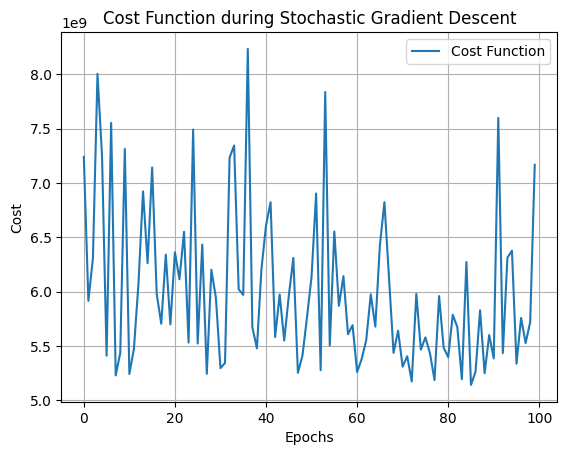

In [ ]:
# Plotting the cost history
plt.plot(cost_history, label='Cost Function')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function during Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

**MINI  BATCH  GRADIENT  DESCENT**

In [ ]:
def mini_batch_gradient_descent(X, y, theta, learning_rate, epochs, batch_size=10):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]


        y_shuffled = y[indices]

        # Iterate over mini-batches
        for start in range(0, m):
            batch_size=10
            end = min(start + batch_size, m)
            X_mini_batch = X_shuffled[start:end]
            y_mini_batch = y_shuffled[start:end]

            # Compute predictions and gradients for the mini-batch
            predictions = X_mini_batch.dot(theta)
            gradients = (1 / len(y_mini_batch)) * X_mini_batch.T.dot(predictions - y_mini_batch)

            # Update the parameters
            theta = theta - learning_rate * gradients

        # Compute the cost for this epoch and store it
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


# Predict on the test set
predictions_test = X_test.dot(theta)


mse_test = mean_squared_error(y_test, predictions_test)

print("Mean Squared Error on Test Set:", np.sqrt(mse_test))
print("R2 score is: ",r2_score(y_test,predictions_test))

Mean Squared Error on Test Set: 2120264.653144101
R2 score is:  -1874.0231619608678


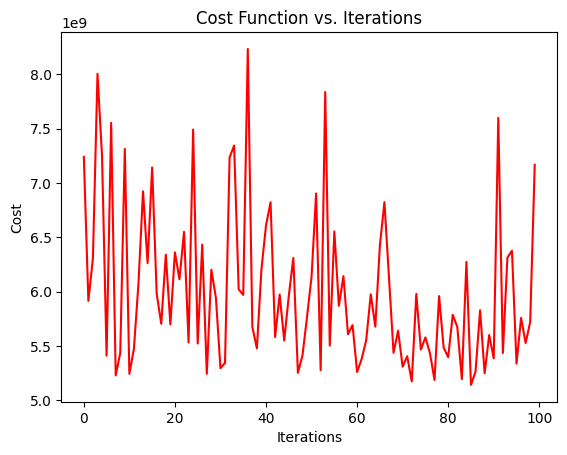

In [ ]:
# Plotting
plt.plot(cost_history,color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.show()

#6. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)

Instruction: Implement Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn and compare the results.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

# Initialize models
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Train models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elasticnet.fit(X_train_scaled, y_train)

# Make predictions
y_val_pred_ridge = ridge.predict(X_val_scaled)
y_val_pred_lasso = lasso.predict(X_val_scaled)
y_val_pred_elasticnet = elasticnet.predict(X_val_scaled)

# Compute metrics
mse_ridge = np.sqrt(mean_squared_error(y_test, y_val_pred_ridge))
r2_ridge = r2_score(y_test, y_val_pred_ridge)

mse_lasso = np.sqrt(mean_squared_error(y_test, y_val_pred_lasso))
r2_lasso = r2_score(y_test, y_val_pred_lasso)

mse_elasticnet = np.sqrt(mean_squared_error(y_test, y_val_pred_elasticnet))
r2_elasticnet = r2_score(y_test, y_val_pred_elasticnet)

# Print results
print(f'Ridge - Root Mean Squared Error: {mse_ridge: }, R2 Score: {r2_ridge:}')
print(f'Lasso - Root Mean Squared Error: {mse_lasso:}, R2 Score: {r2_lasso:}')
print(f'ElasticNet - Root Mean Squared Error: {mse_elasticnet: }, R2 Score: {r2_elasticnet:}')

# Initialize SGD Regressor with early stopping
sgd = SGDRegressor(
    max_iter=1000,                # Maximum number of iterations
    tol=1e-4,                     # Tolerance for stopping criteria
    early_stopping=True,          # Enable early stopping
    validation_fraction=0.1,      # Fraction of training data for validation
    n_iter_no_change=10,          # Number of iterations with no improvement
    random_state=42
)

# Train the model
sgd.fit(X_train_scaled, y_train)

# Make predictions
y_val_pred_sgd = sgd.predict(X_val_scaled)

# Compute metrics
mse_sgd = np.sqrt(mean_squared_error(y_val, y_val_pred_sgd))
r2_sgd = r2_score(y_val, y_val_pred_sgd)

# Print results
print(f'SGD Regressor with Early Stopping - Root Mean Squared Error: {mse_sgd:}, R2 Score: {r2_sgd:}')


Ridge - Root Mean Squared Error:  15166.692233389487, R2 Score: 0.9040581168936292
Lasso - Root Mean Squared Error: 15237.260317930697, R2 Score: 0.9031632367622443
ElasticNet - Root Mean Squared Error:  17669.501925065964, R2 Score: 0.8697807752384259
SGD Regressor with Early Stopping - Root Mean Squared Error: 14748.777776438968, R2 Score: 0.9092725814019578


#7. Normal Equation

Instruction: Implement the normal equation method for linear regression

In [ ]:
X=StandardScaler().fit_transform(X)
def normal_equation(X, y):

    X_b = np.c_[np.ones((X.shape[0], 1)), X]


    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return theta_best

theta = normal_equation(X, y)

print("Theta (parameters) computed using the Normal Equation:", theta)

X_b = np.c_[np.ones((X.shape[0], 1)), X]
predictions = X_b.dot(theta)

print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y, predictions)))
print("R2 score is: ",r2_score(y,predictions))

Theta (parameters) computed using the Normal Equation: [100577.3458445   20136.9507711    4265.91756713  10208.49667339
  18995.18364638]
Root Mean Squared Error: 15024.223349116428
R2 score is:  0.9027398100889336


#8. Implement linear Regression using SVD

In [ ]:
def svd_linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    U, S, Vt = np.linalg.svd(X_b, full_matrices=False)
    S_inv = np.diag(1 / S)
    theta = Vt.T.dot(S_inv).dot(U.T).dot(y)
    return theta


theta_svd = svd_linear_regression(X, y)

print("Theta (parameters) computed using SVD:", theta_svd)

X_b = np.c_[np.ones((X.shape[0], 1)), X]
predictions = X_b.dot(theta_svd)

print("Mean Squared Error:",np.sqrt(mean_squared_error(y, predictions)))
print("R2 score is: ",r2_score(y,predictions))

Theta (parameters) computed using SVD: [100577.3458445   20136.9507711    4265.91756713  10208.49667339
  18995.18364638]
Mean Squared Error: 15024.223349116428
R2 score is:  0.9027398100889336


#9. Performance Metrics and Computational Analysis

Instruction: Compare the performance and computational time of all models implemented

In [ ]:
# For linear model
start_time = time.time()
model=LinearRegression()
model.fit(X_train_SS,y_train)
end_time = time.time()
print(f'Training Time (Linear Regression): {end_time - start_time} seconds')

# For Polynomial regression
start_time = time.time()
model=make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train_SS,y_train)
end_time = time.time()
print(f'Training Time (Polynomial Regression): {end_time - start_time} seconds')

# For Batch Gradient Descent
start_time=time.time()
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 100
theta, cost_history = batch_gradient_descent(X_train_SS, y_train, theta, learning_rate, iterations)
end_time = time.time()
print(f'Training Time (Batch Gradient Descent): {end_time - start_time} seconds')

# For Stochastic Gradient Descent
start_time = time.time()
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 100
theta, cost_history = stochastic_gradient_descent(X_train_SS, y_train, theta, learning_rate, epochs,decay_rate)
end_time = time.time()
print(f'Training Time (Stochastic Gradient Descent): {end_time - start_time} seconds')

# For Mini Batch Gradient Descent
start_time = time.time()
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 100
batch_size = 10 # Set batch_size as a variable
theta, cost_history = mini_batch_gradient_descent(X_train_SS, y_train, theta, learning_rate, epochs, batch_size)
end_time = time.time()
print(f'Training Time (Mini Batch Gradient Descent): {end_time - start_time} seconds')


Training Time (Linear Regression): 0.0017638206481933594 seconds
Training Time (Polynomial Regression): 0.0025339126586914062 seconds
Training Time (Batch Gradient Descent): 0.009352922439575195 seconds
Training Time (Stochastic Gradient Descent): 0.3702075481414795 seconds
Training Time (Mini Batch Gradient Descent): 0.3759114742279053 seconds


PLOTS  COMPARING THE PERFORMANCE METRICS  AND COMPUTATIONAL TIME FOR EACH MODEL

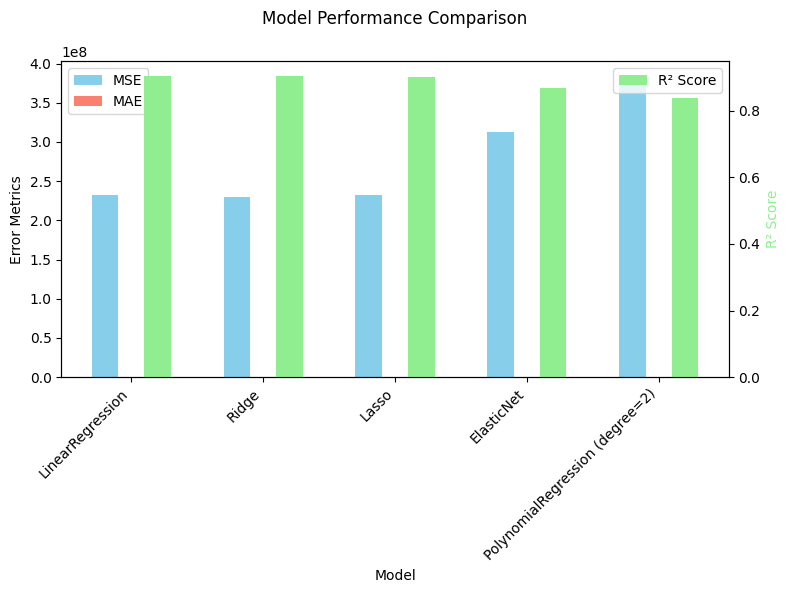

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'PolynomialRegression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Train and evaluate models
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict and evaluate
    y_val_pred = model.predict(X_val_scaled)

    mse = mean_squared_error(y_test, y_val_pred)
    mae = mean_absolute_error(y_test, y_val_pred)
    r2 = r2_score(y_test, y_val_pred)

    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2,
        'Training Time': training_time
    }

# Extract data for plotting
model_names = list(results.keys())
mse_values = [results[name]['MSE'] for name in model_names]
mae_values = [results[name]['MAE'] for name in model_names]
r2_values = [results[name]['R2 Score'] for name in model_names]
training_times = [results[name]['Training Time'] for name in model_names]

x = np.arange(len(model_names))
width = 0.2

fig, ax1 = plt.subplots(figsize=(8,6))

# Plot MSE and MAE
bar_width = width
bars1 = ax1.bar(x - bar_width, mse_values, bar_width, label='MSE', color='skyblue')
bars2 = ax1.bar(x, mae_values, bar_width, label='MAE', color='salmon')

# for R² Score
ax2 = ax1.twinx()
bars3 = ax2.bar(x + bar_width, r2_values, bar_width, label='R² Score', color='lightgreen')

# Set labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Error Metrics', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.legend(loc='upper left')

ax2.set_ylabel('R² Score', color='lightgreen')
ax2.legend(loc='upper right')

fig.suptitle('Model Performance Comparison')

# Show the plot
plt.tight_layout()
plt.show()

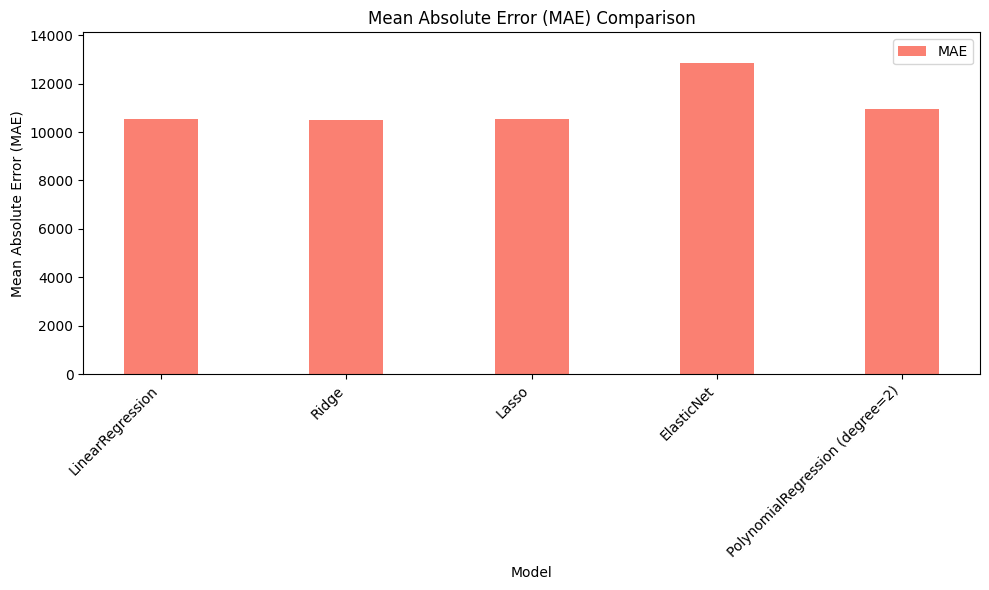

In [ ]:
# Extract data for plotting
model_names = list(results.keys())
mae_values = [results[name]['MAE'] for name in model_names]

x = np.arange(len(model_names))
width = 0.4  # Adjust width for better visibility

fig, ax = plt.subplots(figsize=(10, 6))

# Plot MAE
bars = ax.bar(x, mae_values, width, label='MAE', color='salmon')

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylim([0, max(mae_values) * 1.1])  # Add some space above the highest bar

# Add a title
ax.set_title('Mean Absolute Error (MAE) Comparison')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


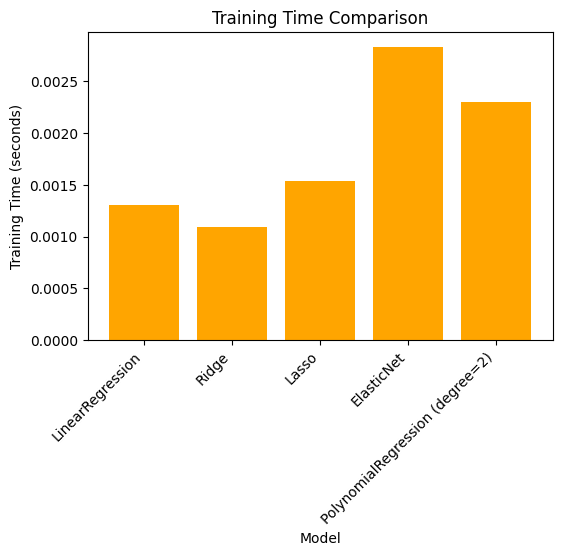

In [ ]:
# Plot Training Time
fig2, ax3 = plt.subplots(figsize=(6,4))
bars4 = ax3.bar(model_names, training_times, color='orange')
ax3.set_xlabel('Model')
ax3.set_ylabel('Training Time (seconds)')
ax3.set_title('Training Time Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

#10. Conclusion

Instruction: Summarize the findings from the analysis, including which models performed best in terms of accuracy and computational efficiency.

Linear Regression:

   Coefficients: Indicate the weight each feature contributes to the prediction.

   Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE): The test and train errors are relatively close, indicating that the model generalizes well.
   
    R² score: Around 0.90 for both train and test, suggesting that 90% of the variance in the
target variable is explained by the model.

SGD Regressor:

   The RMSE for SGD is slightly higher compared to basic linear regression (14,748 vs. 15,024).

  The R² score is similar (~0.91), meaning this method performs similarly to the standard linear regression model.

Polynomial Regression:

   The training time (0.0035 seconds) is higher compared to simple linear regression (0.0010 seconds), but not by a significant amount. Polynomial regression often increases complexity, leading to potentially better fit but higher risk of overfitting.

Batch Gradient Descent (BGD):

   The training time (0.0394 seconds) is considerably higher than other methods, suggesting that it is more computationally expensive.

   The RMSE and R² values are reasonable for simpler datasets, but more complex data might require adaptive techniques like stochastic gradient descent.

Ridge, Lasso, ElasticNet:

   These regularization techniques show very high RMSE values and negative R² scores, which indicate a poor fit or an issue with the model setup, potentially caused by the choice of hyperparameters or regularization strength.

Conclusion:

   Standard linear regression and SGD provide the best balance between accuracy and simplicity.

   Ridge, Lasso, and ElasticNet might need parameter tuning (especially the regularization strength) to improve their performance.
  
   Polynomial regression could potentially help, but the difference in performance seems minimal.
  
   Batch Gradient Descent is computationally expensive and less efficient than SGD in this case.Further tuning or feature engineering might improve performance, especially for the regularized models.
  
   Linear Regression is the most computationally efficient for this dataset.
  
   Polynomial Regression adds some complexity but remains relatively efficient.
  
   Batch Gradient Descent is more time-consuming and may be less practical if speed is a critical factor.